In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("smartcart_customers.csv")

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Handle missing Value

In [4]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [6]:
df["Age"] = 2026-df["Year_Birth"]

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,88,3,8,10,4,7,0,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,6,2,1,1,2,5,0,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,21,42,1,8,2,10,4,0,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,5,2,2,0,4,6,0,0,42
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,27,15,5,5,3,6,5,0,0,45


In [8]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst = True)
reference_date = df["Dt_Customer"].max()
df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"]).dt.days

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days'],
      dtype='object')

In [11]:
df["Total_spending"] = df["MntWines"]+df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"]+df["MntGoldProds"] 

In [12]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [13]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,663,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,113,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,312,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,139,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,161,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,9,3,4,5,0,0,59,381,1341,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,8,2,5,7,0,0,80,19,444,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,2,3,13,6,0,0,45,155,1241,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,6,5,10,3,0,0,70,156,843,1


In [14]:
df["Education"].value_counts()
df["Education"] = df["Education"].replace({
    "Basic":"Undergraduate" , "2n Cycle":"Undergraduate",
    "Graduation":"Graduate",
    "Master":"Postgraduate" ,"PhD":"Postgraduate"
})

In [15]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [16]:
# marital stutas
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [17]:

df["Living_With"] = df["Marital_Status"].replace({
    "Married":"Partner" , "Together":"Partner",
    "Single":"Alone","Divorced":"Alone",
    "Widow ":"Alone" ,"Absurd":"Alone","YOLO":"Alone"
})

In [18]:
df["Living_With"].value_counts()

Living_With
Partner    1444
Alone       719
Widow        77
Name: count, dtype: int64

In [19]:
df.head()
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'Total_spending',
       'Total_Children', 'Living_With'],
      dtype='object')

In [20]:
# drop columns 
cols = ['ID','Year_Birth','Marital_Status','Kidhome','Teenhome','Dt_Customer']
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
col_to_drop = cols + spending_cols 
df_cleaned = df.drop(columns = col_to_drop)

In [21]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


# outlier

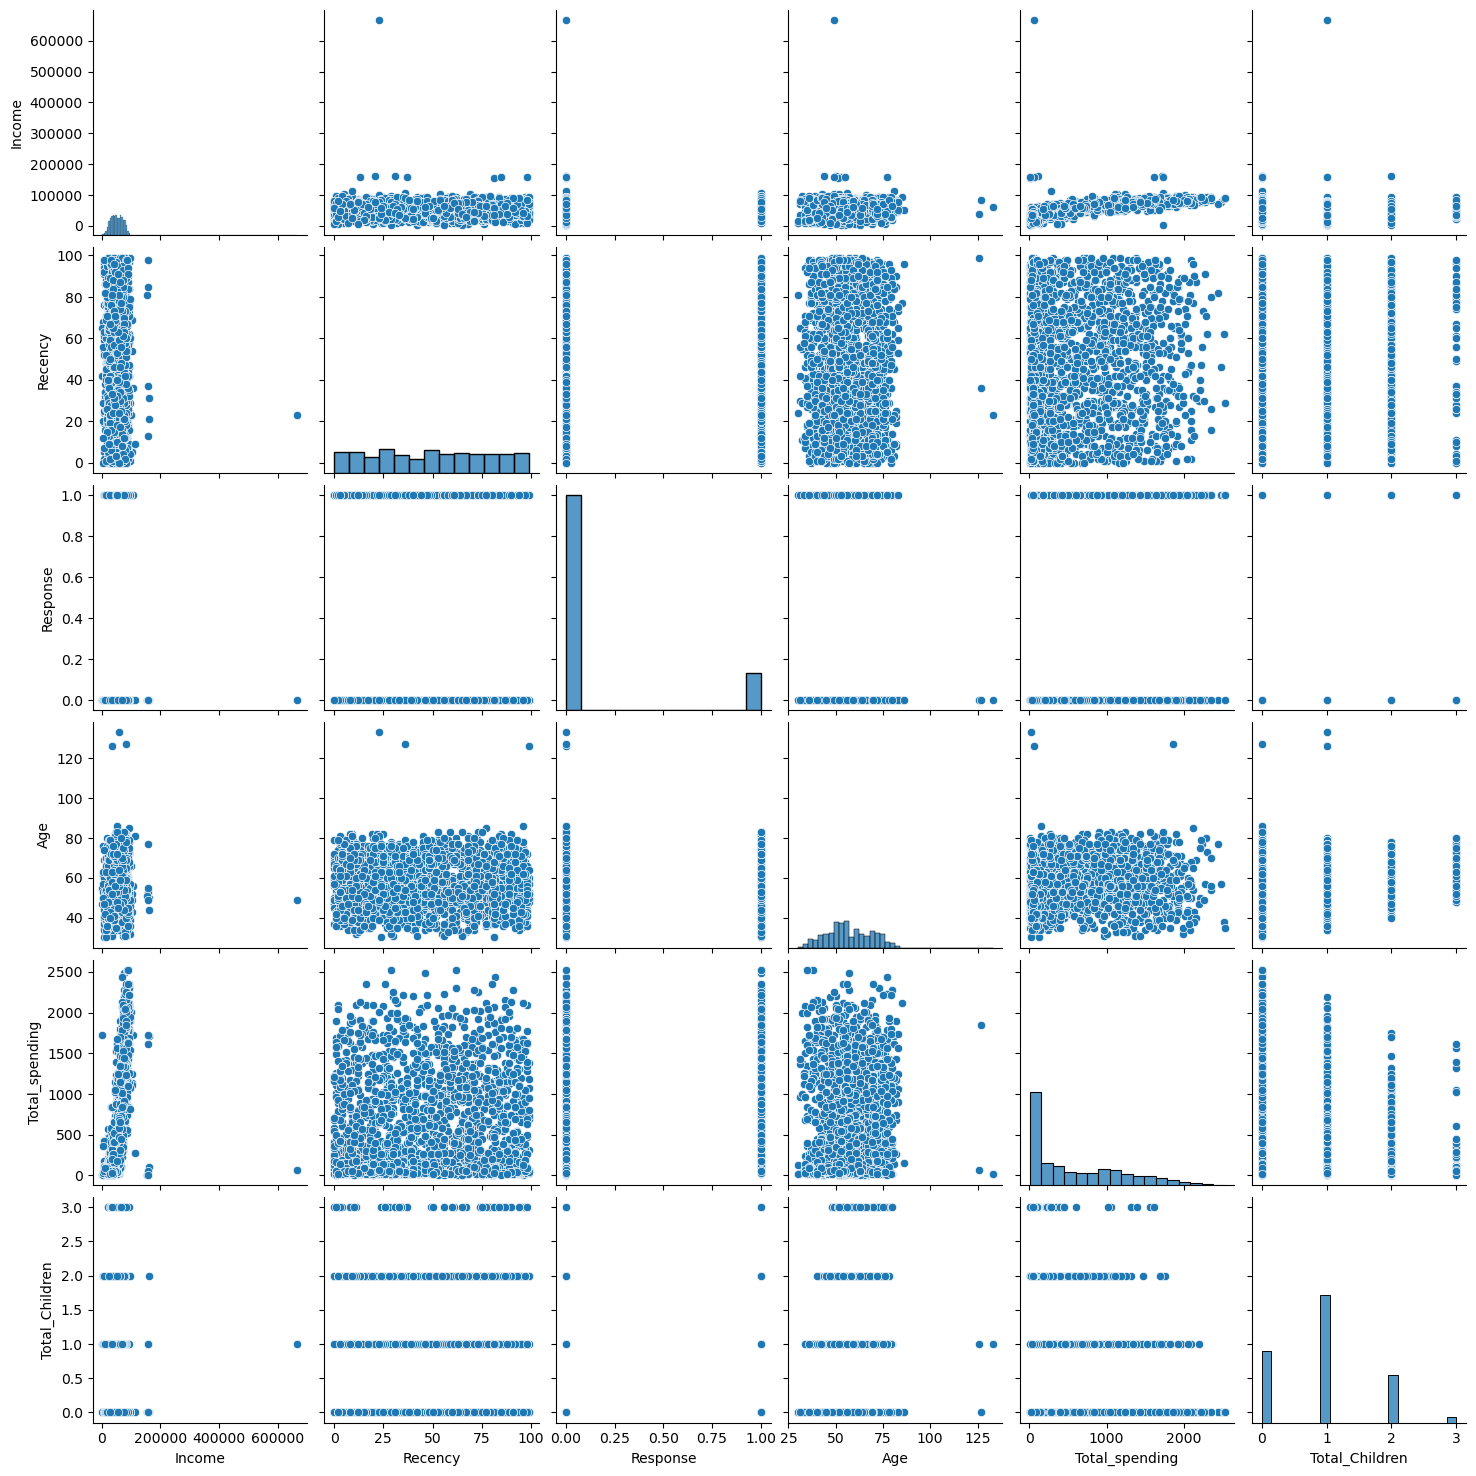

In [22]:
cols = ["Income","Recency","Response","Age","Total_spending","Total_Children"]
sns.pairplot(df_cleaned[cols])

In [23]:
# Remove Outlier 
print("Data size with outlier",len(df_cleaned))

df_cleaned = df_cleaned[(df_cleaned["Age"]< 90)]
df_cleaned = df_cleaned[(df_cleaned["Income"]< 600000)]

print("Data size without outlier",len(df_cleaned))

Data size with outlier 2240
Data size without outlier 2236


# Heatmap 

<Axes: >

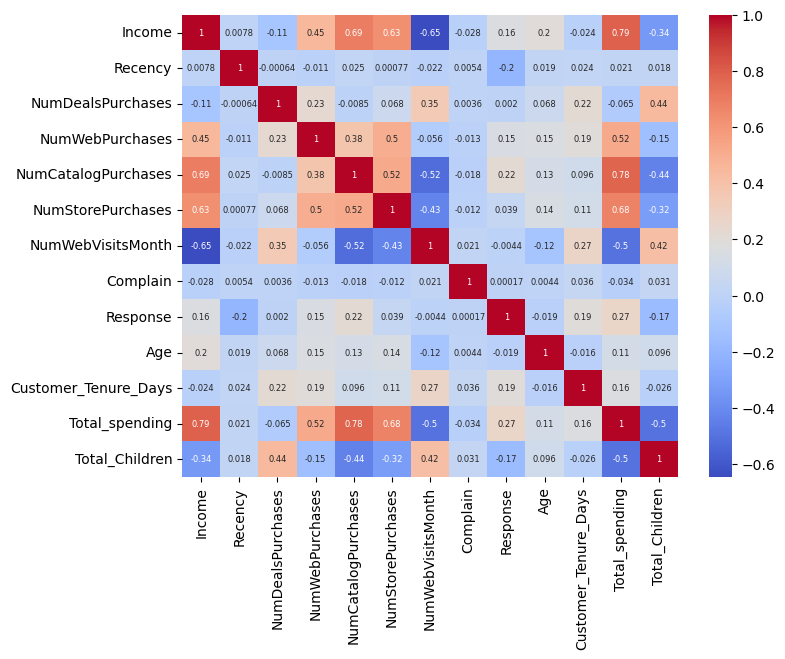

In [24]:

corr = df_cleaned.corr(numeric_only = True)

plt.figure(figsize = (8,6))
sns.heatmap(
    corr,
    annot = True,
    annot_kws = {"size":6},
    cmap = "coolwarm"
    
)

# Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_cols = ["Education","Living_With"]
enc_cols = ohe.fit_transform(df_cleaned[cat_cols])
enc_df = pd.DataFrame(enc_cols.toarray(),columns = ohe.get_feature_names_out(cat_cols),index =df_cleaned.index )

In [26]:
df_encoded = pd.concat([df_cleaned.drop(columns = cat_cols),enc_df],axis = 1)

# Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
X = df_encoded
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [28]:
X_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ...,  1.45552379,
        -1.3476353 , -0.18885089],
       [-0.262003  , -0.38397129, -0.16869955, ...,  1.45552379,
        -1.3476353 , -0.18885089],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.68703789,
         0.74204052, -0.18885089],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ...,  1.45552379,
        -1.3476353 , -0.18885089],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.68703789,
         0.74204052, -0.18885089],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.68703789,
         0.74204052, -0.18885089]])

# Visualize


In [29]:
from sklearn.decomposition import PCA 
pca =  PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)


In [30]:
pca.explained_variance_ratio_

array([0.21962796, 0.10496606, 0.09875785])

Text(0.5, 0.92, '3d Projection')

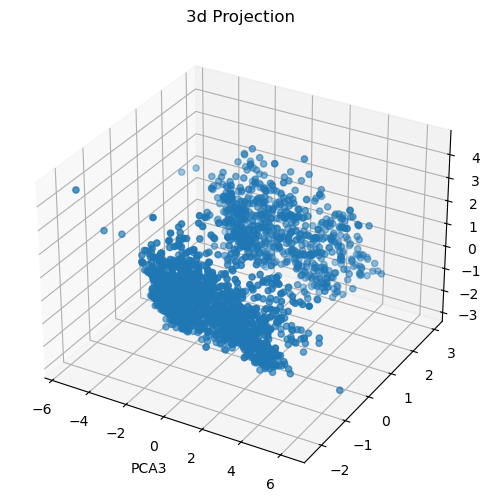

In [31]:
# plot
fig = plt.figure(figsize =(8,6))
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2])
ax.set_xlabel("PCA1")
ax.set_xlabel("PCA2")
ax.set_xlabel("PCA3")
ax.set_title("3d Projection")

# Analyze K Value

# Elbow Method

In [32]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,random_state = 42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [33]:
knee = KneeLocator(range(1,11),wcss,curve = "convex",direction = "decreasing")
optimal_k = knee.elbow

In [34]:
print("Best k =",optimal_k)

Best k = 4


Text(0, 0.5, 'WCSS')

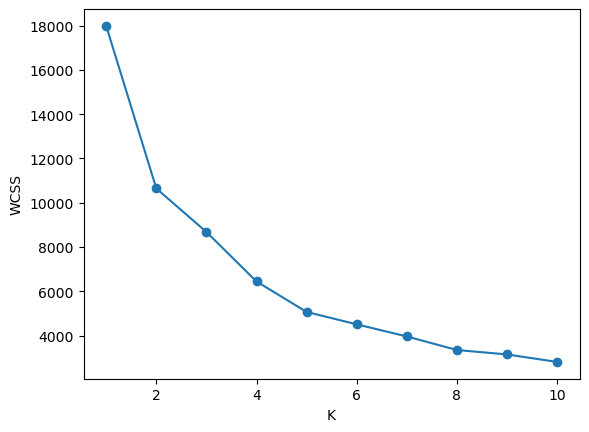

In [35]:
plt.plot(range(1,11),wcss,marker = 'o')
plt.xlabel("K")
plt.ylabel("WCSS")


# Silhouette Score

In [36]:
from sklearn.metrics import silhouette_score
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k,random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca,labels)
    scores.append(score)
    

Text(0, 0.5, 'Silhouette Score')

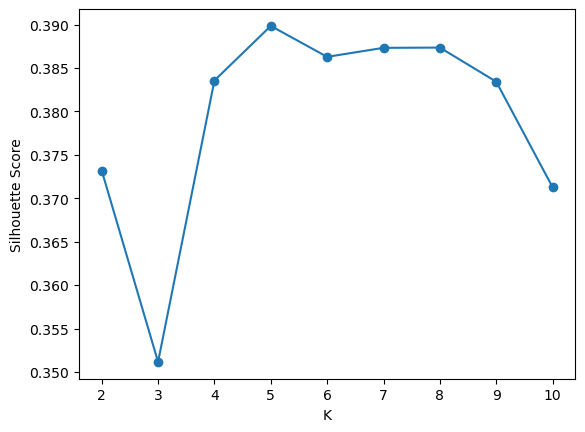

In [37]:
plt.plot(range(2,11),scores,marker = 'o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")


Text(0, 0.5, 'SS')

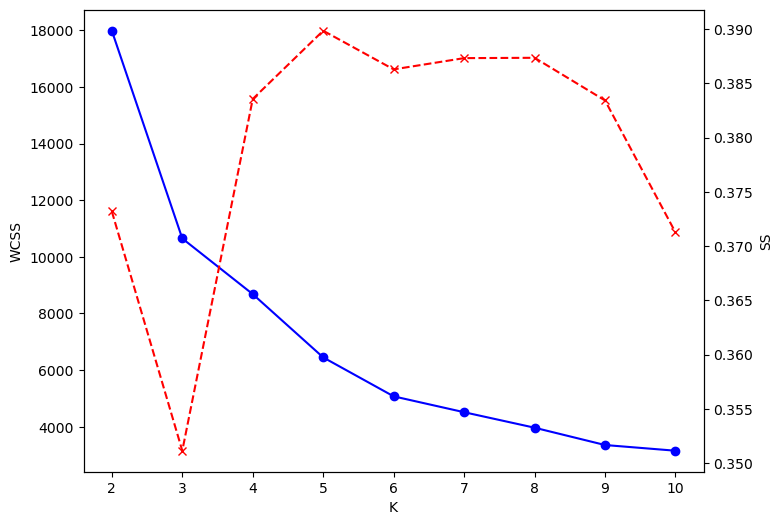

In [38]:
# combine plot 
k_range = range(2,11)
fig,ax1 = plt.subplots(figsize = (8,6))
ax1.plot(k_range,wcss[:len(k_range)],marker = 'o',color = 'blue')
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range,scores[:len(k_range)],marker = 'x',color = 'red',linestyle = "--")
ax2.set_ylabel("SS")

# Clustering

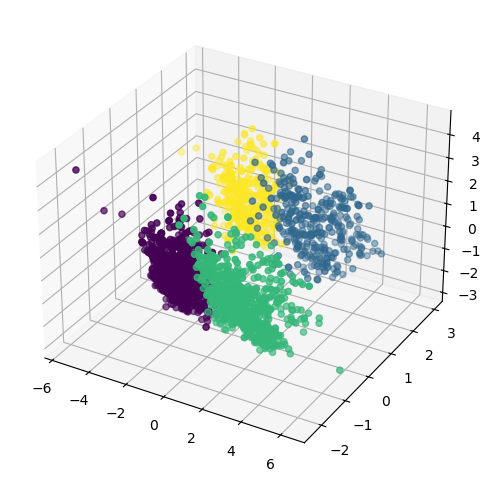

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4,random_state = 42)
label_kmeans  = kmeans.fit_predict(X_pca)
fig = plt.figure(figsize =(8,6))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c =label_kmeans)

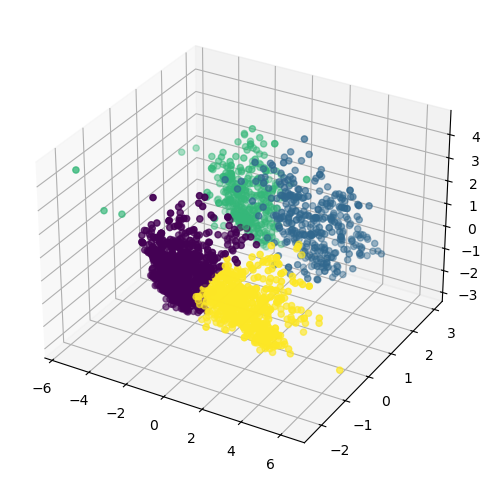

In [40]:
# Agglomerative Clustering 
from sklearn.cluster import AgglomerativeClustering 
agg_clf  =  AgglomerativeClustering(n_clusters = 4,linkage = "ward")
labels_agg = agg_clf.fit_predict(X_pca)
fig = plt.figure(figsize =(8,6))
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c = labels_agg)

In [41]:
# Characterization of Cluster 
X['labels']  = labels_agg
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Living_With_Widow,labels
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,0.0,3
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0.0,0


In [43]:
pal = ["Red","blue","yellow","green"]

<Axes: xlabel='Total_spending', ylabel='Income'>

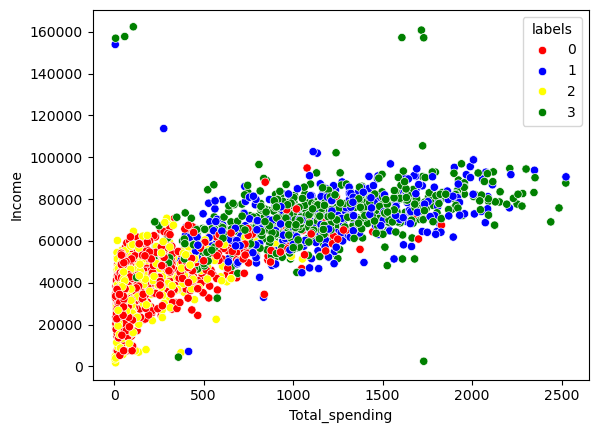

In [44]:
# Income and Spending patterns 
sns.scatterplot(x = X["Total_spending"],y = X["Income"],hue = X["labels"],palette = pal)

In [45]:
#  cluster summary
cluster_summary = X.groupby("labels").mean()
print(cluster_summary)

              Income    Recency  NumDealsPurchases  NumWebPurchases  \
labels                                                                
0       39451.279148  49.278027           2.681614         3.158072   
1       70487.803116  50.662890           1.949008         5.798867   
2       36649.277518  48.049180           2.552693         2.695550   
3       71709.340426  48.700355           1.828014         5.540780   

        NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
labels                                                                        
0                  1.028027           4.147982           6.475336  0.007848   
1                  4.966006           8.388102           3.815864  0.005666   
2                  0.810304           3.606557           6.660422  0.011710   
3                  5.210993           8.436170           3.414894  0.010638   

        Response        Age  Customer_Tenure_Days  Total_spending  \
labels                       